In [65]:
from __future__ import print_function

import pandas as pd 
import numpy as np 
import sklearn

# NLTK/NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk import FreqDist, word_tokenize
import string, re
import urllib
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.collocations import *
import gensim

# Classifiers 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


#Sampling
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

import sklearn.decomposition as decomposition

#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [66]:
# import customized functions
# import import_ipynb
# from custom_functions import *

%run custom_functions.ipynb

In [67]:
df = pd.read_csv('data/cleaned-reshuffled.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.lem_tweet= df.lem_tweet.apply(str)
df.stem_tweet= df.stem_tweet.apply(str)

## Train / Test Split for TF-IDF

In [68]:
X = df.drop(['label'], axis = 1)

In [69]:
y = df['label']

In [70]:
#splitting into train and test 
X_model, X_test, y_model, y_test = train_test_split(X, y, stratify = y,  test_size=0.20, random_state=123)

#splitting "model" into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

# df_train_full = X_train.copy()
# df_train_full['label']= y_train
# train_full_df.to_csv('train_full_df.csv')

In [71]:
y.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

### Upsampling and Downsampling Training Data

In [72]:
upsample_training_data(X_train, y_train)

,id,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet,label
565,20676,@user f*** this ð¦ðº government that deli...,this government that deliberately toures #refu...,this government that deliberately toures refug...,"['this', 'government', 'that', 'deliberately',...","['this', 'govern', 'that', 'deliber', 'tour', ...","['this', 'government', 'that', 'deliberately',...",this government that deliberately toures refug...,this government that deliberately toures refug...,1
21531,24025,despite a demoralizing 2016: may ur #newyear20...,despite demoralizing #newyear #classism free #...,despite demoralizing newyear classism free sag...,"['despite', 'demoralizing', 'newyear', 'classi...","['despit', 'demor', 'newyear', 'classism', 'fr...","['despite', 'demoralizing', 'newyear', 'classi...",despite demoralizing newyear classism free sag...,despite demoralizing newyear classism free sag...,1
13300,18145,"@user #koreans &amp; joseon people in japan, w...",#koreans joseon people japan will abuse claims...,koreans joseon people japan will abuse claims ...,"['koreans', 'joseon', 'people', 'japan', 'will...","['korean', 'joseon', 'peopl', 'japan', 'will',...","['korean', 'joseon', 'people', 'japan', 'will'...",koreans joseon people japan will abuse claims ...,koreans joseon people japan will abuse claims ...,1
18925,8506,@user @user @user @user classic ! yet you jewi...,classic jewish bastards wonder sooo hated world,classic jewish bastards wonder sooo hated world,"['classic', 'jewish', 'bastards', 'wonder', 's...","['classic', 'jewish', 'bastard', 'wonder', 'so...","['classic', 'jewish', 'bastard', 'wonder', 'so...",classic jewish bastards wonder sooo hated world,classic jewish bastards wonder sooo hated world,1
12619,15464,@user did someone say #antisemetic ? gee (((@u...,someone #antisemetic triggered,someone antisemetic triggered,"['someone', 'antisemetic', 'triggered']","['someon', 'antisemet', 'trigger']","['someone', 'antisemetic', 'triggered']",someone antisemetic triggered,someone antisemetic trigg,1
26964,28937,couldn't have said this any better nor truthfu...,couldn have said this better truthfully donny ...,couldn have said this better truthfully donny ...,"['couldn', 'have', 'said', 'this', 'better', '...","['couldn', 'have', 'said', 'this', 'better', '...","['couldn', 'have', 'said', 'this', 'better', '...",couldn have said this better truthfully donny ...,couldn have said this better truthfully donny ...,1
17273,25291,@user racism stuffed into skinny jeans with a ...,racism stuffed into skinny jeans with hipster ...,racism stuffed into skinny jeans with hipster ...,"['racism', 'stuffed', 'into', 'skinny', 'jeans...","['racism', 'stuf', 'into', 'skinni', 'jean', '...","['racism', 'stuffed', 'into', 'skinny', 'jean'...",racism stuffed into skinny jeans with hipster ...,racism stuffed into skinny jeans with hipster ...,1
1561,12717,the end of #me #selfie # #love #messi #cr7 #...,#selfie #love #messi #religion #christianity #...,selfie love messi religion christianity mecca ...,"['selfie', 'love', 'messi', 'religion', 'chris...","['selfi', 'love', 'messi', 'religion', 'christ...","['selfie', 'love', 'messi', 'religion', 'chris...",selfie love messi religion christianity mecca ...,selfie love messi religion christianity mecca l,1
17875,11612,trump ally wishes mad cow disease death for ob...,trump ally wishes disease death obama #unfitto...,trump ally wishes disease death obama unfittob...,"['trump', 'ally', 'wishes', 'disease', 'death'...","['trump', 'alli', 'wish', 'diseas', 'death', '...","['trump', 'ally', 'wish', 'disease', 'death', ...",trump ally wishes disease death obama unfittob...,trump ally wishes disease death obama unfittob...,1
17184,20554,opinion: is rife in the #lgbt community. #gay...,opinion rife #lgbt community #gay people deman...,opinion rife lgbt community gay people demand ...,"['opinion', 'rife', 'lgbt', 'community', 'gay'...","['opinion', 'rife', 'lgbt', 

In [73]:
train_upsampled = upsample_training_data(X_train, y_train)

X_train_up = train_upsampled.drop(['label'], axis = 1)
y_train_up = pd.DataFrame(train_upsampled.label)

In [74]:
train_upsampled['label'].value_counts()

1    18991
0    18991
Name: label, dtype: int64

In [75]:
train_downsampled = downsample_training_data(X_train, y_train)

X_train_down = train_downsampled.drop(['label'], axis = 1)
y_train_down = pd.DataFrame(train_downsampled.label)

In [76]:
train_downsampled['label'].value_counts()

1    1464
0    1464
Name: label, dtype: int64

## Comparing Vectorization and Method Performance

In [77]:
count_vect = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(min_df=.001)
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2), min_df=.001)
tfidf_ngram2 = TfidfVectorizer(ngram_range=(2,3),min_df=.001)

logreg = LogisticRegression()
rfc = RandomForestClassifier(random_state=10)
nb = GaussianNB()
svc = SVC(random_state=10)

vectorization_list = [('COUNT_VECTORIZER', count_vect),
                      ('TFIDF_VECTORIZER', tfidf_vectorizer),
                      ('TFIDF_NGRAM_1_2', tfidf_ngram),
                      ('TFIDF_NGRAM_2_3', tfidf_ngram2)]



In [78]:
%run custom_functions.ipynb

## Naive Bayes

In [14]:
np.random.seed(0)

In [15]:
NB_compare_vectorization_model(X_train.lem_tweet, y_train, 
                                   X_val.lem_tweet, y_val, GaussianNB())

The performance of the COUNT_VECTORIZER is:
Train Accuracy: 0.93
Train Precision: 0.51
Train Recall: 1.0
Train F1: 0.68


Validation Accuracy: 0.85
Validation Precision: 0.24
Validation Recall: 0.63
The performance of the COUNT_VECTORIZER is:
Train Accuracy: 0.93
Train Precision: 0.51
Train Recall: 1.0
Train F1: 0.68


Validation Accuracy: 0.85
Validation Precision: 0.24
Validation Recall: 0.63
Validation F1: 0.34


Validation F1: 0.34


The performance of the TFIDF_VECTORIZER is:
Train Accuracy: 0.6
Train Precision: 0.15
Train Recall: 1.0
Train F1: 0.26


Validation Accuracy: 0.58
Validation Precision: 0.12
Validation Recall: 0.88
Validation F1: 0.21


The performance of the TFIDF_VECTORIZER is:
Train Accuracy: 0.6
Train Precision: 0.15
Train Recall: 1.0
Train F1: 0.26


Validation Accuracy: 0.58
Validation Precision: 0.12
Validation Recall: 0.88
Validation F1: 0.21


The performance of the TFIDF_NGRAM_1_2 is:
Train Accuracy: 0.62
Train Precision: 0.16
Train Recall: 1.0
Train F1: 0.28

{'COUNT_VECTORIZER': {'Train Accuracy': 0.9324370569542899,
  'Train Precision': 0.5144061841180604,
  'Train Recall': 1.0,
  'Train F1': 0.6793503480278421,
  'Validation Accuracy': 0.8461087211576066,
  'Validation Precision': 0.23765786452353616,
  'Validation Recall': 0.6272727272727273,
  'Validation F1': 0.3447127393838468},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.6011733072598386,
  'Train Precision': 0.15215131989191436,
  'Train Recall': 1.0,
  'Train F1': 0.26411690420349987,
  'Validation Accuracy': 0.5803676183026985,
  'Validation Precision': 0.12166666666666667,
  'Validation Recall': 0.8848484848484849,
  'Validation F1': 0.21391941391941394},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.6244927890491322,
  'Train Precision': 0.1600874794969929,
  'Train Recall': 1.0,
  'Train F1': 0.2759920821943633,
  'Validation Accuracy': 0.6018771998435667,
  'Validation Precision': 0.12783595113438045,
  'Validation Recall': 0.8878787878787879,
  'Validation F1': 0.22349351639969486}

{'COUNT_VECTORIZER': {'Train Accuracy': 0.9324370569542899,
  'Train Precision': 0.5144061841180604,
  'Train Recall': 1.0,
  'Train F1': 0.6793503480278421,
  'Validation Accuracy': 0.8461087211576066,
  'Validation Precision': 0.23765786452353616,
  'Validation Recall': 0.6272727272727273,
  'Validation F1': 0.3447127393838468},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.6011733072598386,
  'Train Precision': 0.15215131989191436,
  'Train Recall': 1.0,
  'Train F1': 0.26411690420349987,
  'Validation Accuracy': 0.5803676183026985,
  'Validation Precision': 0.12166666666666667,
  'Validation Recall': 0.8848484848484849,
  'Validation F1': 0.21391941391941394},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.6244927890491322,
  'Train Precision': 0.1600874794969929,
  'Train Recall': 1.0,
  'Train F1': 0.2759920821943633,
  'Validation Accuracy': 0.6018771998435667,
  'Validation Precision': 0.12783595113438045,
  'Validation Recall': 0.8878787878787879,
  'Validation F1': 0.22349351639969486}

## Logistic Regression

In [35]:
SMOTE_vector_model(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, tfidf_vectorizer, logreg)

Train Accuracy: 0.88
Train Precision: 0.35
Train Recall: 0.86
Train F1: 0.5


Validation Accuracy: 0.86
Validation Precision: 0.27
Validation Recall: 0.72
Validation F1: 0.4
Train Accuracy: 0.88
Train Precision: 0.35
Train Recall: 0.86
Train F1: 0.5


Validation Accuracy: 0.86
Validation Precision: 0.27
Validation Recall: 0.72
Validation F1: 0.4


Predicted,0,1,All
Actual,,,
0,4148,636,4784
1,91,239,330
All,4239,875,5114


Predicted,0,1,All
Actual,,,
0,4148,636,4784
1,91,239,330
All,4239,875,5114


In [18]:
%run custom_functions.ipynb

In [63]:
#Logistic Regression: compare vectorizers with class weight balances + lemmatizing
LR_cw_lemm = compare_vectorization_model(X_train.lem_tweet, 
                            y_train, X_val.lem_tweet, y_val, 
                            LogisticRegression(class_weight='balanced', solver = 'lbfgs'))

In [64]:
pd.DataFrame(LR_cw_lemm)

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.88,0.88,0.24
Train F1,0.92,0.51,0.51,0.16
Train Precision,0.85,0.36,0.36,0.09
Train Recall,0.99,0.88,0.88,0.99
Validation Accuracy,0.95,0.86,0.86,0.22
Validation F1,0.65,0.41,0.41,0.14
Validation Precision,0.61,0.28,0.28,0.08
Validation Recall,0.69,0.72,0.72,0.98


In [58]:
#Logistic Regression: compare vectorizers with SMOTE + lemmatizing
LR_smote_lemm = SMOTE_compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                                    y_val, LogisticRegression(class_weight='balanced', solver= 'lbfgs'))

In [59]:
LR_smote_lemm 

{'COUNT_VECTORIZER': {'Train Accuracy': 0.99,
  'Train Precision': 0.85,
  'Train Recall': 0.99,
  'Train F1': 0.92,
  'Validation Accuracy': 0.95,
  'Validation Precision': 0.61,
  'Validation Recall': 0.69,
  'Validation F1': 0.65},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.88,
  'Train Precision': 0.36,
  'Train Recall': 0.88,
  'Train F1': 0.51,
  'Validation Accuracy': 0.86,
  'Validation Precision': 0.28,
  'Validation Recall': 0.72,
  'Validation F1': 0.41},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.88,
  'Train Precision': 0.36,
  'Train Recall': 0.88,
  'Train F1': 0.51,
  'Validation Accuracy': 0.86,
  'Validation Precision': 0.28,
  'Validation Recall': 0.72,
  'Validation F1': 0.41},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.24,
  'Train Precision': 0.09,
  'Train Recall': 0.99,
  'Train F1': 0.16,
  'Validation Accuracy': 0.22,
  'Validation Precision': 0.08,
  'Validation Recall': 0.98,
  'Validation F1': 0.14}}

{'COUNT_VECTORIZER': {'Train Accuracy': 0.99,
  'Train Precision': 0.85,
  'Train Recall': 0.99,
  'Train F1': 0.92,
  'Validation Accuracy': 0.95,
  'Validation Precision': 0.61,
  'Validation Recall': 0.69,
  'Validation F1': 0.65},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.88,
  'Train Precision': 0.36,
  'Train Recall': 0.88,
  'Train F1': 0.51,
  'Validation Accuracy': 0.86,
  'Validation Precision': 0.28,
  'Validation Recall': 0.72,
  'Validation F1': 0.41},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.88,
  'Train Precision': 0.36,
  'Train Recall': 0.88,
  'Train F1': 0.51,
  'Validation Accuracy': 0.86,
  'Validation Precision': 0.28,
  'Validation Recall': 0.72,
  'Validation F1': 0.41},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.24,
  'Train Precision': 0.09,
  'Train Recall': 0.99,
  'Train F1': 0.16,
  'Validation Accuracy': 0.22,
  'Validation Precision': 0.08,
  'Validation Recall': 0.98,
  'Validation F1': 0.14}}

In [18]:
#Logistic Regression: compare vectorizers with upsampling + lemmatizing
compare_vectorization_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   LogisticRegression(class_weight='balanced', solver='lbfgs'))

{'COUNT_VECTORIZER': {'Train Accuracy': 0.99,
  'Train Precision': 0.99,
  'Train Recall': 1.0,
  'Train F1': 0.99,
  'Validation Accuracy': 0.95,
  'Validation Precision': 0.62,
  'Validation Recall': 0.69,
  'Validation F1': 0.65},
 'TFIDF_VECTORIZER': {'Train Accuracy': 0.93,
  'Train Precision': 0.93,
  'Train Recall': 0.94,
  'Train F1': 0.93,
  'Validation Accuracy': 0.91,
  'Validation Precision': 0.38,
  'Validation Recall': 0.76,
  'Validation F1': 0.51},
 'TFIDF_NGRAM_1_2': {'Train Accuracy': 0.94,
  'Train Precision': 0.93,
  'Train Recall': 0.95,
  'Train F1': 0.94,
  'Validation Accuracy': 0.91,
  'Validation Precision': 0.4,
  'Validation Recall': 0.76,
  'Validation F1': 0.52},
 'TFIDF_NGRAM_2_3': {'Train Accuracy': 0.65,
  'Train Precision': 0.92,
  'Train Recall': 0.32,
  'Train F1': 0.48,
  'Validation Accuracy': 0.93,
  'Validation Precision': 0.38,
  'Validation Recall': 0.23,
  'Validation F1': 0.28}}

In [54]:
#Logistic Regression: compare vectorizers using stemming + class balances
pd.DataFrame(compare_vectorization_model(X_train.stem_tweet, y_train, X_val.stem_tweet, 
                                    y_val, LogisticRegression(class_weight='balanced', solver='lbfgs')))

,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.88,0.88,0.24
Train F1,0.92,0.50,0.50,0.16
Train Precision,0.86,0.35,0.35,0.09
Train Recall,1.00,0.86,0.86,0.99
Validation Accuracy,0.95,0.86,0.86,0.21
Validation F1,0.65,0.40,0.40,0.14
Validation Precision,0.62,0.28,0.28,0.07
Validation Recall,0.68,0.72,0.71,0.98


,COUNT_VECTORIZER,TFIDF_VECTORIZER,TFIDF_NGRAM_1_2,TFIDF_NGRAM_2_3
Train Accuracy,0.99,0.88,0.88,0.24
Train F1,0.92,0.50,0.50,0.16
Train Precision,0.86,0.35,0.35,0.09
Train Recall,1.00,0.86,0.86,0.99
Validation Accuracy,0.95,0.86,0.86,0.21
Validation F1,0.65,0.40,0.40,0.14
Validation Precision,0.62,0.28,0.28,0.07
Validation Recall,0.68,0.72,0.71,0.98


##### Regularization:

- Count Vectorizer:   

l2 (default), no alpha tuning: F1: 0.99, 0.66
C = .1:  .91,  .52
C = .2:  .96,  .57
C = .3:  .98,  .58
C = .01:  .67,  .39
C = .001:  .62, .39

In [79]:
single_vector_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, count_vect, 
                   LogisticRegression(penalty = 'l1', C = .1,  class_weight='balanced'))

Train Accuracy: 0.91
Train Precision: 0.93
Train Recall: 0.9
Train F1: 0.91


Validation Accuracy: 0.92
Validation Precision: 0.41
Validation Recall: 0.69
Validation F1: 0.51


Predicted,0,1,All
Actual,,,
0,4455,329,4784
1,102,228,330
All,4557,557,5114


In [88]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)

In [92]:
log = LogisticRegression(class_weight='balanced', penalty = 'l1', C = .001)

In [93]:
logreg.fit(X_train_countvect, y_train_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_val_predict = logreg.predict(X_val_countvect)

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [101]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
average_precision = average_precision_score(y_val, y_val_predict)

print('Average precision-recall score RF: {}'.format(average_precision))

Average precision-recall score RF: 0.4491201439676215


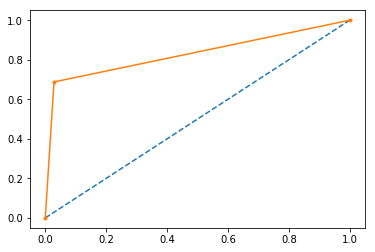

In [99]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_predict)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.45')

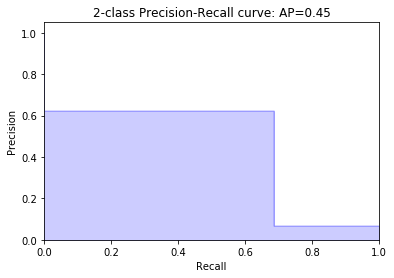

In [103]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_val, y_val_predict)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [107]:
pd.DataFrame(confusion_matrix(y_val, y_val_predict), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

,predicted 0,predicted 1
actual 0,4647,137
actual 1,103,227


In [118]:
predicts = []
for item in logreg.predict_proba(X_val_countvect):
    if item[0] <= .40:
        predicts.append(1)
    else:
        predicts.append(0)

In [119]:
#with threshhold adjustment
pd.DataFrame(confusion_matrix(y_val, predicts), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

,predicted 0,predicted 1
actual 0,4686,98
actual 1,116,214


## SVM


In [ ]:
#class weight = balanced + lemmatized
compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   SVC(class_weight ='balanced', gamma='auto', ))

In [ ]:
#upsampling + lemmatized
compare_vectorization_model(X_train_up.lem_tweet, y_train_up, X_val.lem_tweet, y_val, 
                                   SVC(class_weight ='balanced', gamma ='auto'))

In [ ]:
#SMOTE + lemmatized 
SMOTE_compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, 
                                    y_val, SVC(class_weight ='balanced', gamma='auto', ))

#### Grid Searching:

In [ ]:
X_train_tfid2 =  tfidf_ngram2.fit_transform(X_train_up.lemmatized_tweet)
X_val_tfid2 =  tfidf_ngram2.transform(X_val.lemmatized_tweet)

In [ ]:
# svc = SVC(kernel='linear', C=1, gamma=1, class_weight ='balanced')

params = {
'C': [0.1,.2, .3, 0.8,1,1.2,1.4],
'kernel':['linear', 'rbf'],
'gamma' :[0.1,0.8,1,1.2,1.4]
}

svm_gs= GridSearchCV(svc, param_grid = params, cv = 3)

scores = ['f1','accuracy','recall']

In [ ]:
svm_gs.fit(X_train_tfid2, y_train_up)

In [ ]:
svm_gs.best_estimator_

In [ ]:
single_vector_model()

In [ ]:
compare_vectorization_model(X_train_up.lemmatized_tweet, y_train_up, X_val.lemmatized_tweet, y_val, 
                                   SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))

# Random Forest

### Compare Multiple Methods:

In [ ]:
np.random.seed(0)

In [ ]:
# Random Forest: compare vectorizers with class weight balances + lemmatizing 
pd.DataFrame(compare_vectorization_model(X_train.lem_tweet, y_train, X_val.lem_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20, 
                                   n_estimators = 100, class_weight='balanced', random_state=10)))

In [ ]:
# Random Forest: compare vectorizers with upsampling + lemmatizing 
compare_vectorization_model(X_train_up.lemmatized_tweet, y_train_up, X_val.lemmatized_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20,
                                   n_estimators = 100, class_weight='balanced', random_state=10))

In [ ]:
# Random Forest: compare vectorizers with SMOTE + lemmatizing  
SMOTE_compare_vectorization_model(X_train.lemmatized_tweet, y_train, X_val.lemmatized_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 20,
                                   n_estimators = 100, class_weight = 'balanced', random_state=10))

In [ ]:
# Random Forest: compare vectorizers with upsampling + stemming
compare_vectorization_model(X_train.stemmed_tweet_meta, y_train, X_val.stemmed_tweet_meta, y_val, 
                                   RandomForestClassifier(max_depth= 20,
                                   n_estimators = 100, class_weight='balanced', random_state=10))

#### Random Forest Fine-Tuning Hyperparameters: Max depth 10.... regularization??

In [ ]:
# Random Forest: compare vectorizers with upsampling + lemmatizing 
compare_vectorization_model(X_train_up.lemmatized_tweet, y_train_up, X_val.lemmatized_tweet, y_val, 
                                   RandomForestClassifier(max_depth= 10,
                                   n_estimators = 100, class_weight='balanced', random_state=10))

In [ ]:
compare_vectorization_model(X_train_up.lemmatized_tweet, y_train_up, X_val.lemmatized_tweet, y_val, 
                                   RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False))

### Grid-Searching

In [ ]:
np.random.seed(0)
# rfc = RandomForestClassifier(n_estimators=60, max_depth=6, random_state=10, class_weight = 'balanced')

In [31]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)
X_val_countvect =  count_vect.transform(X_val.lem_tweet)
# X_test_countvect = count_vect.transform(X_test.lemmatized_tweet)

In [ ]:
np.random.seed(0)

parameters = {'n_estimators' : [40, 60, 80, 100],
'max_leaf_nodes' : [200, 400, 600],
'random_state' : [10],
'max_depth': [5, 7, 10, 20],
 'verbose' : [0],
'class_weight': ['balanced']
             }
          
rfc_gs = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state = 10), param_grid=parameters, cv = 3)

In [ ]:
rfc_gs.fit(X_train_countvect, y_train_up)

In [ ]:
rfc_gs.best_params_

In [ ]:
rfc_gs.best_estimator_

In [ ]:
rfc_gs.score(X_val_countvect, y_val)

In [22]:
rfc2 = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=200, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [23]:
rfc2.fit (X_train_countvect, y_train_up)

NameError: name 'X_train_countvect' is not defined

In [ ]:
y_train_predict = rfc2.predict(X_train_countvect)
metrics.f1_score(y_train_up, y_train_predict)

In [ ]:
y_val_predict = rfc2.predict(X_val_countvect)

In [ ]:
metrics.f1_score(y_val, y_val_predict)

In [ ]:
compare_vectorization_model(X_train.lemmatized_tweet, y_train, X_val.lemmatized_tweet, y_val, 
                     RandomForestClassifier(class_weight='balanced'))

## Word2Vec

In [ ]:
import gensim
# https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
np.random.seed(0)

In [ ]:
# word2vec = gensim.models.Word2Vec()

In [ ]:
# t = time()

# word2vec.build_vocab(df_tokenized_list, progress_per=10000)

# print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

# Word to Vec

### X-train pre-processing

In [ ]:
X_train.tokenized_tweet.head()

In [ ]:
X_train.tokenized_tweet.shape

In [ ]:
X_train_token_list = list(X_train['tokenized_tweet'])
X_train_token_sumlist = sum(X_train_token_list,[])

In [ ]:
X_train_unique_tokens = set(X_train_token_sumlist)
print('The unique number of words in the training dataset is: {}'.format(len(X_train_unique_tokens)))

In [ ]:
X_train_unique_tokens

In [ ]:
X_train_token_list

#### X-val pre-processing

In [ ]:
# X_val_token_list = list(X_val['tokenized_tweet'])
# X_val_token_sumlist = sum(X_val_token_list,[])
# X_val_unique_tokens = set(X_val_token_sumlist)

# print('The unique number of words in the validation dataset is: {}'.format(len(X_val_unique_tokens)))

#### X-test pre-processing

In [ ]:
# X_test_token_list = list(X_test['tokenized_tweet'])
# X_test_token_sumlist = sum(X_test_token_list,[])

# X_test_unique_tokens = set(X_test_token_sumlist)
# print('The unique number of words in the training dataset is: {}'.format(len(X_test_unique_tokens)))

### Modeling

In [ ]:
from time import time
t = time()

w2v = gensim.models.Word2Vec(X_train_token_list, sg=1, min_count=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v.train(X_train_token_list, total_examples=w2v.corpus_count, epochs=w2v.epochs)

In [ ]:
#w2v.save('w2v-min1.model')
# w2v = gensim.models.Word2Vec.load('w2v-min1.model')

In [ ]:
w2v.corpus_count

In [ ]:
w2v_vocab= w2v.wv.vocab

In [ ]:
len(w2v_vocab)

In [ ]:
w2v.wv.vectors.shape

In [ ]:
w2v.wv['trump']

In [ ]:
w2v.wv.most_similar(['trump'])

In [ ]:
w2v.wv.most_similar(positive=['lazy','black'])

In [ ]:
w2v.wv

In [ ]:
w2v.wv.get_keras_embedding

In [ ]:
w2v_X = w2v.wv.vectors

#### Classification with Word2Vec

In [ ]:
np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [ ]:
sentence = df_tokenized_list[1]
sentence

In [ ]:
np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0)

In [ ]:
 np.mean([w2v[w] for w in sentence if w in w2v]  or np.zeros(100)

In [ ]:
input_to_lr = np.empty((31410, 100))
for sentence in X_train_token_list:
    np.append(input_to_lr, np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0))
# np.mean([w2v[w] for w in sentence if w in w2v], axis=0)

In [ ]:
input_to_lr[0]

In [ ]:
input_to_lr[0].shape

In [ ]:
X_temp = input_to_lr

In [ ]:
X_temp_df = pd.DataFrame(X_temp)

In [ ]:
a.fit(X_train_temp, y)
a.score(X_train_temp, y)
c = a.predict(X_train_temp)
# print scores  
print('Train Accuracy: ' + str(round(metrics.f1_score(y, c),2)))

## NN

## RNN 

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [ ]:
X_train_sample, X_train_remainder, y_train_sample, y_train_remainder = train_test_split(X_train, y_train, test_size=0.99, random_state=123)

In [ ]:
X_train_sample.shape

In [ ]:
X_RNN_sample= X_train_sample['tokenized_tweet']

In [ ]:
X_RNN_sample

In [ ]:
y_RNN_sample=y_train_sample
y_RNN_sample.shape

In [ ]:
# define documents
docs = X_RNN_sample
# define class labels
labels = y_RNN_sample

In [ ]:
# integer encode the documents
vocab_size = 100
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

## Word2Vec Visualization

In [ ]:
# model = gensim.models.Word2Vec(df_tokenized_list, size=dimsize, window=5, min_count=50, workers=4)

In [ ]:
# tsne_plot(w2v_model)

### Extra

In [ ]:
%run custom_functions.ipynb

In [ ]:
#size of hidden layer (length of continuous word representation)
dimsize= 100

# model_w2v = gensim.models.Word2Vec(X_train_token_list, size= dimsize, window=5, min_count=1, workers=4)
model_w2v = gensim.models.Word2Vec(X_train_token_list, size= dimsize,min_count=1)



#create average vector for train and test from model
#returned list of numpy arrays are then stacked 
X_train_w2v = np.concatenate([avg_word_vectors(w, dimsize, model_w2v) for w in X_train_token_list])
X_val_w2v = np.concatenate([avg_word_vectors(w,dimsize, model_w2v) for w in X_val_token_list])

In [ ]:
X_train_w2v[0]

In [ ]:
X_val_w2v[0]

In [ ]:
X_train_token_list.shape

In [ ]:
input_to_lr = np.empty((31410, 100))
for sentence in X_train_token_list:
    np.append(input_to_lr, np.mean([model_w2v[w] for w in sentence if w in model_w2v]
                   or [np.zeros(100)], axis=0))

In [ ]:
input_to_lr[0]

In [ ]:
def smote_w2v_model (X_train_w2v, y_train, X_val_w2v, y_val, classifier):
        
    smote = SMOTE(random_state=1, sampling_strategy='not majority')
        
    pipe = make_pipeline(smote, classifier) 
    
    model = pipe.fit(X_train_w2v, y_train)
    
    train_predictions = model.predict(X_train_w2v)
    val_predictions = model.predict (X_val_w2v)
    
   # print scores  
    print('Train Accuracy: ' + str(round(metrics.accuracy_score(y_train, train_predictions),2)))
    print('Train Precision: ' + str(round(metrics.precision_score(y_train, train_predictions),2)))
    print('Train Recall: ' + str(round(metrics.recall_score(y_train, train_predictions),2)))
    print('Train F1: ' + str(round(metrics.f1_score(y_train, train_predictions),2)))
    print('\n')
    print('Validation Accuracy: ' + str(round(metrics.accuracy_score(y_val, val_predictions),2)))
    print('Validation Precision: ' + str(round(metrics.precision_score(y_val, val_predictions),2)))
    print('Validation Recall: ' + str(round(metrics.recall_score(y_val, val_predictions),2)))
    print('Validation F1: ' + str(round(metrics.f1_score(y_val, val_predictions),2)))

    log_confusion_test = pd.crosstab(y_val, val_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    return log_confusion_test

In [ ]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, RandomForestClassifier(n_estimators=100, max_depth= 20))

In [ ]:
def pca_smote_w2v_model (X_train_w2v, y_train, X_val_w2v, y_val, classifier):
    
    pca = decomposition.PCA(n_components=50)
    
    smote = SMOTE(random_state=1, sampling_strategy='not majority')
        
    pipe = make_pipeline(pca, smote, classifier) 
    
    model = pipe.fit(X_train_w2v, y_train)
    
    train_predictions = model.predict(X_train_w2v)
    val_predictions = model.predict (X_val_w2v)
    
   # print scores  
    print('Train Accuracy: ' + str(round(metrics.accuracy_score(y_train, train_predictions),2)))
    print('Train Precision: ' + str(round(metrics.precision_score(y_train, train_predictions),2)))
    print('Train Recall: ' + str(round(metrics.recall_score(y_train, train_predictions),2)))
    print('Train F1: ' + str(round(metrics.f1_score(y_train, train_predictions),2)))
    print('\n')
    print('Validation Accuracy: ' + str(round(metrics.accuracy_score(y_val, val_predictions),2)))
    print('Validation Precision: ' + str(round(metrics.precision_score(y_val, val_predictions),2)))
    print('Validation Recall: ' + str(round(metrics.recall_score(y_val, val_predictions),2)))
    print('Validation F1: ' + str(round(metrics.f1_score(y_val, val_predictions),2)))

    log_confusion_test = pd.crosstab(y_val, val_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    return log_confusion_test

In [ ]:
pca_smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, LogisticRegression(solver='lbfgs'))

In [ ]:
pca_smote_w2v_model(X_train_w2v, y_train, X_val_w2v, y_val, RandomForestClassifier(n_estimators=100, max_depth=20))

## Glove Embeddings

In [ ]:
# !pip install glove_python

In [ ]:
# ! pip install glove

In [ ]:
# ! pip install glovepy

In [ ]:
from gensim.models import KeyedVectors
filename = 'glove.twitter.27B.100d.txt'

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = 'glove.twitter.27B.100d.txt'
glove_output_file = 'glove.txt.word2vec'
glove2word2vec(glove_input_file, glove_output_file)

In [ ]:
glove_model = KeyedVectors.load_word2vec_format('glove.txt.word2vec', binary=False)

In [ ]:
glove_model.most_similar('love')

In [ ]:
glove_model['love']

In [ ]:
len(glove_model.vocab)

In [ ]:
X_train_glove = np.concatenate([avg_word_vectors(w, dimsize, glove_model) for w in X_train_token_list])
X_val_glove = np.concatenate([avg_word_vectors(w, dimsize, glove_model) for w in X_val_token_list])

In [ ]:
X_train_glove[255]

In [ ]:
X_train_glove_2 = np.empty((31410, 100))
for sentence in X_train_token_list:
    np.append(input_to_lr, np.mean([glove_model[w] for w in sentence if w in glove_model]
                   or [np.zeros(100)], axis=0))

In [ ]:
X_train_glove_2[225]

In [ ]:
X_train_glove.shape

In [ ]:
X_train.shape

####  Learnco 

In [ ]:
glove_dict = {}
with open('glove.twitter.27B.100d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in X_train_unique_tokens:
            vector = np.array(parts[1:], dtype=np.float32)
            glove_dict[word] = vector

In [ ]:
glove_dict['love']

In [ ]:
input_to_lr = np.empty((31410, 100))
for sentence in X_train_token_list:
    np.append(input_to_lr, np.mean([w2v[w] for w in sentence if w in w2v]
                   or [np.zeros(100)], axis=0))

In [ ]:
input_to_lr['love']

## Classification with Word Embeddings

In [ ]:
pca_smote_w2v_model(X_train_glove, y_train, X_val_glove, y_val, RandomForestClassifier(n_estimators=100, max_depth=10))

In [ ]:
def smote_w2v_model (X_train_w2v, y_train, X_val_w2v, y_val, classifier):
        
    smote = SMOTE(random_state=1, sampling_strategy='not majority')
        
    pipe = make_pipeline(smote, classifier) 
    
    model = pipe.fit(X_train_w2v, y_train)
    
    train_predictions = model.predict(X_train_w2v)
    val_predictions = model.predict (X_val_w2v)
    
   # print scores  
    print('Train Accuracy: ' + str(round(metrics.accuracy_score(y_train, train_predictions),2)))
    print('Train Precision: ' + str(round(metrics.precision_score(y_train, train_predictions),2)))
    print('Train Recall: ' + str(round(metrics.recall_score(y_train, train_predictions),2)))
    print('Train F1: ' + str(round(metrics.f1_score(y_train, train_predictions),2)))
    print('\n')
    print('Validation Accuracy: ' + str(round(metrics.accuracy_score(y_val, val_predictions),2)))
    print('Validation Precision: ' + str(round(metrics.precision_score(y_val, val_predictions),2)))
    print('Validation Recall: ' + str(round(metrics.recall_score(y_val, val_predictions),2)))
    print('Validation F1: ' + str(round(metrics.f1_score(y_val, val_predictions),2)))

    log_confusion_test = pd.crosstab(y_val, val_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    return log_confusion_test

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, RandomForestClassifier(max_depth=10))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, RandomForestClassifier(max_depth=10))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression(penalty ='l1', C = 10,
                                                                            class_weight='balanced'))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression(penalty ='l1', C = .001,
                                                                            class_weight='balanced'))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, LogisticRegression(penalty ='l1', class_weight='balanced'))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, 
                 LogisticRegression(penalty ='l2', C = 5, class_weight ={0: 5 , 1: 5}))

In [ ]:
smote_w2v_model (X_train_glove, y_train, X_val_glove, y_val, 
                 LogisticRegression(penalty ='l2', C = .1, class_weight ={0: 5 , 1: 5}))

# Testing Trump Tweets

In [40]:
trump_df= pd.read_csv('data/cleaned-trump-tweet.csv')
trump_df.head()

,Unnamed: 0,tweet,tidy_tweet,no_hash_tweet,tokenized_tweet,stemmed_tokens,lemmatized_tokens,lem_tweet,stem_tweet
0,0,So Robert Mueller has now asked for his long t...,Robert Mueller asked long time Never Trumper l...,Robert Mueller asked long time Never Trumper l...,"['Robert', 'Mueller', 'asked', 'long', 'time',...","['robert', 'mueller', 'ask', 'long', 'time', '...","['Robert', 'Mueller', 'asked', 'long', 'time',...",Robert Mueller asked long time Never Trumper l...,robert mueller asked long time never trumper l...
1,1,The young leaders here today (@TPUSA) are part...,young leaders here today part movement unlike ...,young leaders here today part movement unlike ...,"['young', 'leaders', 'here', 'today', 'part', ...","['young', 'leader', 'here', 'today', 'part', '...","['young', 'leader', 'here', 'today', 'part', '...",young leaders here today part movement unlike ...,young leaders here today part movement unlike ...
2,2,Congratulations to our new Secretary of Defens...,Congratulations Secretary Defense Mark twitter,Congratulations Secretary Defense Mark twitter,"['Congratulations', 'Secretary', 'Defense', 'M...","['congratul', 'secretari', 'defens', 'mark', '...","['Congratulations', 'Secretary', 'Defense', 'M...",Congratulations Secretary Defense Mark twitter,congratulations secretary defense mark twitt
3,3,"Oh well, we still have the great @seanhannity ...",well still have great hear really strong show ...,well still have great hear really strong show ...,"['well', 'still', 'have', 'great', 'hear', 're...","['well', 'still', 'have', 'great', 'hear', 're...","['well', 'still', 'have', 'great', 'hear', 're...",well still have great hear really strong show ...,well still have great hear really strong show ...
4,4,THANK YOU @TPUSA! #MAGApic.twitter.com/1eqR2Im8dQ,THANK #MAGApic twitter,THANK MAGApic twitter,"['THANK', 'MAGApic', 'twitter']","['thank', 'magap', 'twitter']","['THANK', 'MAGApic', 'twitter']",THANK MAGApic twitter,thank magapic twitt


In [49]:
trump_df.stem_tweet

0     robert mueller asked long time never trumper l...
1     young leaders here today part movement unlike ...
2          congratulations secretary defense mark twitt
3     well still have great hear really strong show ...
4                                   thank magapic twitt
5     just watched eric swalwell asked endless softb...
6     just back only hear last minute change allowin...
7     budget deal gives great victories military vet...
8     know over many years chairman police athletic ...
9     saddened learn recent passing morgenthau truly...
10    leaving turning point will speaking some great...
11    when wall southern border that crumbling falli...
12    almost minnesota because america hating anti s...
13    tariffs remittance fees above guatemala been g...
14    guatemala which been forming caravans sending ...
15    farmers starting great again after years downw...
16                                   keep america great
17    congratulations boris johnson becoming pri

In [32]:
X_train_countvect =  count_vect.fit_transform(X_train_up.lem_tweet)

In [33]:
logreg.fit(X_train_countvect, y_train_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
X_trump = count_vect.transform(trump_df.lem_tweet)

In [54]:
X_trump = X_trump.toarray()

In [52]:
X_trump.shape

(20, 283)

In [45]:
X_train_up.shape

(37982, 9)

In [46]:
X_train.shape

(20455, 9)